# **IEOR 4404  Simulation (Fall 2019)**

**Homework 4[Total points: 60]**

** Due: 11:59 PM, Nov 2 

This third homework focuses on the inverse transform method for discrete distributions.

The steps to finish in the homework:

*   Step 1: Make a copy of the file to your LionDrive.
*   Step 2: Work with the copy (an ipynb file).
*    <font color='red'>**Step 3: Rename the copy to your_uni_hw4.ipynb (For example: yd4501_hw4.ipynb).**</font>  
*   Step 4: Submit the copy on CourseWorks.

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)




In [1]:
#This imports all the packages you need for the homework
#Please run this first
#we will need this for array operation
import numpy as np

#We will need this for special computation
import scipy.special as spsp

#We will need this for stats computation
import scipy.stats as spst


#We will need this for visualization
import matplotlib.pyplot as plt

#We can use this for math functions
import math
 
#We can use this for sympy function
import sympy

In [2]:
#Your Name:Vaishnavi Avachat
#Your UNI:vma2120

#Exercise 1  [Total: 36 Points]


##Q1. [12 points]

The great thing about rejection sampling is that it requires neither the PMF of the target distribution nor the PMF of the proposal distribution to be normalized. 

For example, let's assume we have $P_{proposal}(t)=\frac{1}{5}$ where $t=2,3,4,5,6$. Let's also assume that we have $P_{target}(x)=\frac{x}{z}$ where $x=2,3,4,5,6$.  Here, $z$ is a normalizing constant to ensure that $\sum P_{target}(x)=1$ 

* Compute the value of z that makes $\sum P_{target}(x)=1$ 
* Based on rejection sampling method, generate 10000 samples from $x$ distribution that follows $P_{target}(x)=\frac{x}{z}$. When generating the samples from the proposal distribution, use the inverse transform method. When doing the rejection sampling, use the parallel method.
* Pretend that $P_{Target}(x)=x$ and do exactly the same thing as your did in the last part. Show that (1) you will get a different value of $c$ (2) the sample distribution still follows the original target distribution $P_{target}(x)=\frac{x}{z}$ based on visualization. In this part, since $c$ value is not computed based on normalized PMF, you should not use $c$ value to compute the number of proposals you need. For this question, simply generate 16000 proposals in the first stage.

In [3]:
#Compute z
x = np.array([2,3,4,5,6])
z = np.sum(x)
z

20

1.4999999999999998


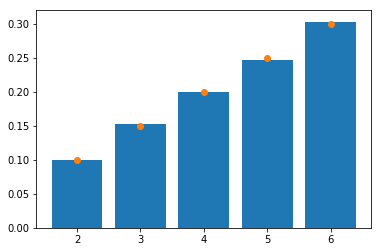

In [4]:
#rejection sampling using normalized target PMF
def rejection_normalized(N):
  outcomes = np.array([2,3,4,5,6])
  pmf_proposal = np.repeat(1/5,len(outcomes))
  pmf_target = outcomes/z
  cdf_array = np.cumsum(pmf_proposal)

  def inverse_transform():
    u = np.random.rand()
    for i in range(0,5):
      if u<cdf_array[i]:
        return outcomes[i]
  c = np.max(pmf_target/pmf_proposal)
  print(c)


  AR = pmf_target/pmf_proposal/c
  N_proposal = int(N*c+4*(N*(c**2-c))**0.5)
  U = np.random.rand(N_proposal)
  proposals = np.array([inverse_transform() for i in range(N_proposal)])
  AR_array = [AR[list(outcomes).index(i)] for i in proposals]
  samples = proposals[U<AR_array][0:N]
  return samples

#visualization
outcomes = np.array([2,3,4,5,6])
pmf_target = outcomes/z
samples = rejection_normalized(N=10000)
x, counts = np.unique(samples,return_counts=True)
plt.bar(x, counts/np.sum(counts))
plt.scatter(outcomes,pmf_target,zorder=2)
plt.show()

In [5]:
outcomes = np.array([2,3,4,5,6])
pmf_proposal = np.repeat(1/5,len(outcomes))
pmf_target = outcomes
c = np.max(pmf_target/pmf_proposal)
c

30.0

30.0


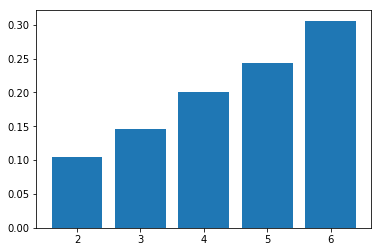

In [6]:
#rejection sampling using unnormalized target PMF.

def rejection_unnormalized(N):
  outcomes = np.array([2,3,4,5,6])
  pmf_proposal = np.repeat(1/5,len(outcomes))
  pmf_target = outcomes
  cdf_array = np.cumsum(pmf_proposal)
  def inverse_transform():
    u = np.random.rand()
    for i in range(5):
      if u < cdf_array[i]:
        return outcomes[i]
  c = np.max(pmf_target/pmf_proposal)
  print(c)
  AR = pmf_target/pmf_proposal/c
  N_proposal = 16000
  U = np.random.rand(N_proposal)
  proposals = np.array([inverse_transform() for i in range(N_proposal)])
  AR_array = [AR[list(outcomes).index(i)] for i in proposals]
  samples = proposals[U<AR_array][0:N]
  return samples

#visualize the sample distribution and the theoretical distribution of the normalized the target PMF 
outcomes=np.array([2,3,4,5,6])
pmf_target=outcomes
samples=rejection_unnormalized(N=10000)
x, counts=np.unique(samples,return_counts=True)
plt.bar(x, counts/np.sum(counts))
#plt.scatter(outcomes,pmf_target,zorder=2)
plt.show()

##Q2. [10 points]

Assume that $x \sim Normal(\mu,\sigma^2)$.

We have $z=\lfloor x \rfloor $ follows a discrete distribution. In addition, $P(z)=F(z+1)-F(z)$, where $F(z)$ is the CDF of the normal distribution at $z$. You can use `scipy.stats.norm.cdf(x,loc,scale)` to compute the CDF. 

Also, `np.random.normal(loc,scale,size)` will help you generate samples from a normal distribution 

* Construct function `DiscreteNormal` to return N samples from $z$ distribution.
* Assume $\mu=10$  $\sigma=6$, $N=10000$, draw 10000 samples from $z$ distribution.
* Plot the distribution of the samples you draw using a scatter plot.
* In the same graph, use bar chart to plot the theoretical PMF of the $z$ distribution for the range between the lowest value of the samples and the highest value of the samples.


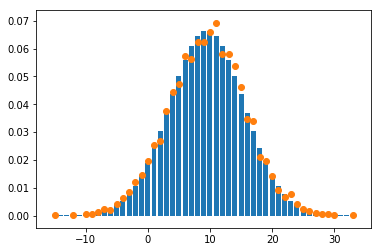

In [7]:
#define the function 
def DiscreteNormal(mu=0,sigma=1, N=1):
  x = np.random.normal(mu,sigma,N)
  samples = np.floor(x)
  return samples 

# generate the samples
samples = DiscreteNormal(mu=10,sigma=6, N=10000)
# visualize the sample distribution and the theoretical distribution
outcomes, counts = np.unique(samples,return_counts=True)
Outcomes = np.arange(np.min(outcomes), np.max(outcomes+1))
PMF = spst.norm.cdf(Outcomes+1,10,6)-spst.norm.cdf(Outcomes,10,6)

#visualization
plt.bar(Outcomes,PMF,label="theory")
plt.scatter(outcomes,counts/np.sum(counts),zorder=2,label="samples")
plt.show()


## Q3. [14 points]

Conway-Maxwell-Poisson distribution is a discrete probability distribution that generalizes the Poisson distribution by adding a parameter to model overdispersion and underdispersion.

The PMF of this distribution follows:

$P(x)=\frac{\lambda^x}{(x!)^\nu Z(\lambda,\nu)}$, where $Z(\lambda,\nu)$ is a normalizing constant, so that $\sum P(x)=1$. For this distribution, the range of $x$ is $0, 1, 2, 3, ..., $

* Based on the idea discussed in Q1, generate 10000 samples from this distribution with $\lambda=5$,$\nu=0.7$ assuming that you do not know the value of the normalizing constant. Use the distribution in Q2 with $\mu=10$ and $\sigma=6$ as the proposal distribution. When doing the sampling, do NOT used parallel method. 
* Visualize the sample distribution of the 10000 samples you generated.

Help: You might find $ \lambda^x$ or $(x!)^\lambda$ in the target PMF overflow for large $x$ value, causing some inaccuracy in your calculation. Remember, $P(x)=exp(log(P(x)))$. Also, $log(x!)=log(Gamma(x+1))$. $log(Gamma(x+1))$ can be computed using `scipy.special.gammaln(x+1)`.





<BarContainer object of 27 artists>

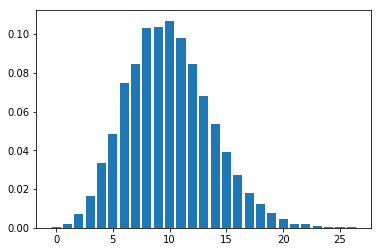

In [8]:
#any other commands
lmbda, v = 5, 0.7
x = np.linspace(0,50,51)
prop_pmf = spst.norm.pdf(x,10,6)
target_pmf = np.exp(x*np.log(lmbda)-v*spsp.gammaln(x+1))
c = np.max(target_pmf/prop_pmf)

#generate one sample
def rejection():
  proposal = np.floor(np.random.normal(10,6,1))
  pmf_proposal = spst.norm.pdf(proposal,10,6)
  pmf_target = np.exp(proposal*np.log(lmbda)-v*spsp.gammaln(proposal+1))

  while (np.random.rand()>pmf_target/pmf_proposal/c):
    proposal = np.floor(np.random.normal(10,6,1))
    pmf_proposal = spst.norm.pdf(proposal,10,6)
    pmf_target = np.exp(proposal*np.log(lmbda)-v*spsp.gammaln(proposal+1))
  return proposal


#generate many samples
samples = [rejection() for i in range(10000)]

#Visualize the sample distribution
outcomes, counts = np.unique(samples,return_counts=True)

#plt.scatter(outcomes,counts/np.sum(counts),zorder=2,label="samples")
plt.bar(outcomes, counts/np.sum(counts))

#Exercise 2 [24 Points]

##Setting

The three-point-estimate is commonly used in industry for project management, risk management, etc. For example, team members can provide their optimistic (a), pessimistic (b), and best guess (c) estimates for their deliverables. A distribution will then be constructed based on those three values. 

The triangular distribution is a **continuous** distribution that follows a triangular shape. It is commonly used to construct the distribution following the three-point-estimate. 

For example, a team might be asked to give an estimation of the time it would take to finish the project. The team might come up with the pessimistic guess of 30 days, the optimistic guess of 10 days, and their best guess of 25 days. Then, a distribution of the number of days $x$ will be constucted as follows

$f(x)=
  \begin{cases}
    \frac{2(x-a)}{(b-a)(c-a)}, & \text{for } a \leq x < c \\
    \frac{2(b-x)}{(b-a)(b-c)}, & \text{for } c \leq x < b \\
    0, & \text{otherwise}
  \end{cases}
$


We will have $a<c<b$. In our case, $a$ will correspond to the optimistic value, $c$ will correspond to the best guess, and $b$ will correspond to the pessimistic value. 



## Q1. [3 points]
Plot the pdf of the distribution of the number of days using the triangular distribution with the information provided by the team 



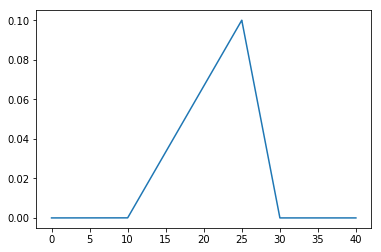

In [9]:
#Visualization
a, b, c = 10, 30, 25
outcomes = np.linspace(0,40,10000)
pdf = np.repeat(0.0,10000)

BM1, BM2 = (outcomes>=a) * (outcomes<c), (outcomes>=c) * (outcomes<b)
pdf[BM1], pdf[BM2] = 2*(outcomes[BM1]-a)/(b-a)/(c-a), 2*(b-outcomes[BM2])/(b-a)/(b-c)

#visualization
plt.plot(outcomes,pdf)

## Q2. [6 points]

* Use a uniform distribution with the best bounds as the proposal distribution  to generate 10000 samples from the distribution described in the setting. Use the parallel method. 

* After generate the samples, plot the distribution of the samples.

1.9997999799979997


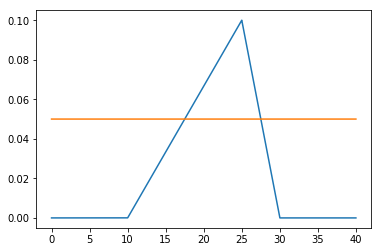

In [10]:
a, b, c = 10, 30, 25
pmf_prop = np.repeat(1/(b-a),len(outcomes))
max_c = np.max(pdf/pmf_prop)
print(max_c)

#visualization
plt.plot(outcomes,pdf)
plt.plot(outcomes,pmf_prop)
plt.show()

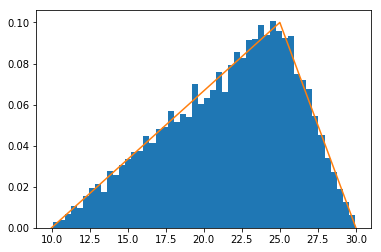

In [11]:
a, b, c = 10, 30, 25
outcomes = np.linspace(10,30,10000)
pdf = np.repeat(0.0,10000)
BM1, BM2 = (outcomes>=a) * (outcomes<c), (outcomes>=c) * (outcomes<b)
pdf[BM1], pdf[BM2] = 2*(outcomes[BM1]-a)/(b-a)/(c-a), 2*(b-outcomes[BM2])/(b-a)/(b-c)

#define a function used to generate the samples using rejection method and done in parallel:
def triangle_reject(N):
  N_proposal = int(N*max_c+4*(N*(max_c**2-max_c))**0.5)
  u = np.random.rand(N_proposal)
  proposals = a + (b-a)*u 
  target_pdf = np.repeat(0.0,N_proposal)
  BM1, BM2 = (proposals>=a) * (proposals<c), (proposals>=c) * (proposals<b)
  target_pdf[BM1], target_pdf[BM2] = 2*(proposals[BM1]-a)/(b-a)/(c-a), 2*(b-proposals[BM2])/(b-a)/(b-c)
  prop_pdf = np.repeat(1/(b-a),N_proposal)
  ar_array = target_pdf/prop_pdf/max_c
  U = np.random.rand(N_proposal)
  samples = proposals[U<ar_array][0:N]
  return samples

#generate the samples
samples = triangle_reject(N=10000)

#visualization
plt.hist(samples,density=True,bins=50)
plt.plot(outcomes,pdf)
plt.show()

## Q3. [10 points]

We can also use inverse transform method to directly generate the samples from the target distribution. 

* Generate 10000 samples using the inverse transform method. Use `sympy` to show the derivation.

* After generate the samples, plot the distribution of the samples.

Hint: When doing the inverse transform method, you will want to deal with (a,c) and (c,b) separately. Think about what the CDF function is  for $x$ in range (a,c) and in range (c,b). Same idea applys to the stage when you draw $u \sim Unif(0,1)$ and convert it to $x$ using the inverse CDF function.

In [12]:
import sympy
a, b, c, x = sympy.Symbol("a"), sympy.Symbol("b"), sympy.Symbol("c"), sympy.Symbol("x")
cdf_x_a_c=sympy.integrate(2*(x-a)/(b-a)/(c-a),(x,a,x))
cdf_x_c_b=sympy.integrate(2*(b-x)/(b-a)/(b-c),(x,c,x))+0.75
cdf_x_a_c

a**2/(a**2 - a*b - a*c + b*c) - 2*a*x/(a**2 - a*b - a*c + b*c) + x**2/(a**2 - a*b - a*c + b*c)

In [13]:
a, b, c, x, u = sympy.Symbol("a"), sympy.Symbol("b"), sympy.Symbol("c"), sympy.Symbol("x"), sympy.Symbol("u")
cdf_x_a_c = sympy.integrate(2*(x-a)/(b-a)/(c-a),(x,a,x))
sample_x = sympy.solve(cdf_x_a_c-u,x)
sample_x

[a - sqrt(u*(a - b)*(a - c)), a + sqrt(u*(a - b)*(a - c))]

In [14]:
cdf_x_c_b = sympy.integrate(2*(b-x)/(b-a)/(b-c),(x,c,x))
sample_x = sympy.solve(cdf_x_c_b-u,x)
sample_x

[b - sqrt((b - c)*(a*u - b*u + b - c)), b + sqrt((b - c)*(a*u - b*u + b - c))]

(array([0.00353222, 0.00605523, 0.00883054, 0.01110125, 0.01362426,
        0.01564267, 0.020941  , 0.02396861, 0.01867029, 0.02523012,
        0.02674393, 0.03305146, 0.03834978, 0.03582677, 0.03759288,
        0.0436481 , 0.05046024, 0.04541421, 0.04894643, 0.05348785,
        0.05752467, 0.05828157, 0.05954308, 0.06635521, 0.0643368 ,
        0.0648414 , 0.0635799 , 0.07846567, 0.08048408, 0.07417655,
        0.08174558, 0.07997948, 0.08275479, 0.08956692, 0.08931462,
        0.08931462, 0.09688365, 0.10344349, 0.09410834, 0.08073638,
        0.07695186, 0.07266274, 0.06534601, 0.05197404, 0.04692802,
        0.03380836, 0.02422091, 0.01993179, 0.00958744, 0.00504602]),
 array([10.14953032, 10.54588201, 10.94223369, 11.33858538, 11.73493707,
        12.13128876, 12.52764045, 12.92399214, 13.32034382, 13.71669551,
        14.1130472 , 14.50939889, 14.90575058, 15.30210226, 15.69845395,
        16.09480564, 16.49115733, 16.88750902, 17.2838607 , 17.68021239,
        18.07656408, 18.47

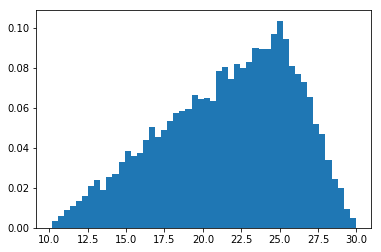

In [15]:
#define a function used to generate the samples using inverse method:

def triangle_inverse(N):
  u=np.random.rand(N)
  samples=np.repeat(0.0,N)
  a, b, c = 10, 30, 25

  for i in range(len(u)):
    if u[i] <= 0.75:
      samples[i] = a + math.sqrt(u[i]*(a - b)*(a - c))
    else:
      samples[i] = b - math.sqrt((b - c)*(a*(u[i]-0.75) - b*(u[i]-0.75) + b - c))
  return samples

#generate the samples 
samples = triangle_inverse(N=10000)
#visualize the distribution of samples 
plt.hist(samples,density=True,bins=50)


## Q4. [5 points]

The team estimated that the profit that they will get from the project follows the following formula.

$Profit=18000-(20-days)^2*100$

<font color='blue'>Find the 95% confidence interval of the expected profit based on the 10000 samples generated.</font>

In [16]:

#expected value of the profit 
def profit(samples):
  profit = 18000 - (20-samples)**2*100
  mean = np.mean(profit)
  std = np.std(profit,ddof=1)
  half_interval = spst.norm.ppf(0.975)* std/(len(samples))**0.5
  lower = mean-half_interval
  upper = mean+half_interval
  return lower, upper


In [17]:
lower, upper = profit(samples)
lower, upper

(15861.675957039603, 15943.952691725015)